# Dynamic Programming Project
### By : <b>Mathis WAUQUIEZ & Célestin HANS</b>

## I. Maintenance problem

1) <p style="color:green">Justify why maximizing the expected revenue makes sense</p>

Maximizing the expected revenue makes sense, because the owners of the machine wants to make as much money as possible

3) <p style="color:green">Solve the probleme using Dynamic Programming</p>

In [1]:
import numpy as np

T = 12                  # Time horizon

states = np.arange(4)  # The four states of the machines, respectively new, in good shape, old or broken
actions = np.arange(4) # The four actions that can be done, respectively nothing, maintining, repairing, or replacing

V = np.zeros((T, 4))
actions_taken = np.zeros((T, 4), dtype=int) # The stategy we want to build, describing actions to take per time and state

V[-1, :] = [30, 20, 10, 0] # The expected gain for each state at the end

def transition_cost(state, action):
    """ Cost of the action => 0 if we do nothing, 10 for maintenance, 70 for replacing / 15/15/30/50 for repairing, according to the machine's state"""
    return [0, 10, ..., 70][action] if action != 2 else [15,15,30,50][state]

def earnings(state):
    return [30, 20, 10, 0][state] # Earnings of the machine according to its state

""" Below are the transition probabilites for each action """

repair_probs = np.array([[0,1,0,0]]*4) # When repairing a machine, no matter its state, it will end in good shape
                                       # The choice of the transition probabilities for the case when the machine is
                                       # new does not matter since it is not an optimal choice to repair it (less earnings / added cost)

replace_probs = np.array([[1,0,0,0]]*4) # When replacing a machine, no matter its state, it will become new
                                        # Same remark as before for when the machine is already new

maintain_probs = np.array([ [0, 1,  0,    0], # A new machine will be in good shape the next month
                            [0, 0.8, 0.2, 0], # A machine in good shape will most likely remain in good shape but can get older
                            [0, 0,   0.9, 0.1],
                            [0, 0,   0,   1]])# A broken machine stays broken, we can fix it with maintenance

do_nothing_probs = np.array([[0, 1,  0,    0], # Same comments as above
                            [0, 0.3, 0.7, 0], 
                            [0, 0,   0.5, 0.5],
                            [0, 0,   0,   1]])

probs = np.stack([do_nothing_probs, maintain_probs, repair_probs, replace_probs]) # 4x4x4 matrix containing the transitions probabilities for each action


""" Dynamic Programming Main Algorithm """

for t in range(T-2, -1, -1): # t := T-1 => 0
    for state in range(4):
        outcomes = [] # gain to go to final state using optimal strategy
        for action in actions:
            outcomes.append(-transition_cost(state, action) + earnings(state) + V[t+1]@probs[action][state]) # - cost of action + earnings + expected gain of future states using the strategy

        best_action = np.argmax(outcomes) # best action, which maximizes the revenue
        best_earning = np.max(outcomes) # expected gain starting at time t and state "state" with optimal strategy
        
        V[t, state] = best_earning # update the expected gains for the optimal strategy
        actions_taken[t, state] = best_action


## <b>BONUS |</b> Simulation of the machines:

### Creating the Machine class and its methods

In [2]:
class Machine:
    """ Simulates a machine and its states """
    def __init__(self):
        # new; good shape; old; broken
        self.state = 0
        self.earnings = 0
    
    def replace(self):
        self.state = 0
        self.earnings -= 70
    
    def repair(self):
        self.earnings -= [0, 15, 30, 50][self.state] # same remark concerning the cost when repairing a new machine => choice is useless
        self.state = 1
    
    def maintain(self):
        probs = np.array([[0, 1,  0,    0], # see the comments above on this matrix
                          [0, 0.8, 0.2, 0],
                          [0, 0,   0.9, 0.1],
                          [0, 0,   0,   1]])
        
        self.state = np.random.choice(range(4), p=probs[self.state])
        self.earnings -= 10
    
    def do_nothing(self):
        probs = np.array([[0, 1,  0,    0],
                          [0, 0.3, 0.7, 0],
                          [0, 0,   0.5, 0.5],
                          [0, 0,   0,   1]])
        
        self.state = np.random.choice(range(4), p=probs[self.state])
        self.earnings -= 10

    def take_step(self, action):
        self.earnings += [30, 20, 10, 0][self.state]
        action()
    
    def execute_action(self, strategy):
        actions = [self.do_nothing, self.maintain, self.repair, self.replace]
        choosen_action = actions[strategy[self.state]]
        self.take_step(choosen_action)

    def execute_strategy(self, policy):
        self.earnings += [30, 20, 10, 0][self.state]
        for strategy in policy:
            self.execute_action(strategy)
        
        

strategy = [
    0, # new => do_nothing
    0, # good shape => do_nothing
    1, # old => mainain
    2 # broken => repair
]

policy = np.array([strategy] * 12)

machine = Machine()
machine.execute_strategy(policy)
print(machine.earnings)

20


### Running multiple simulations of given strategies

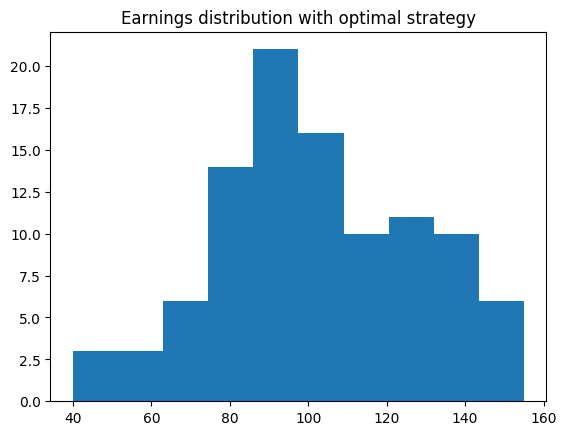

Average money earned with optimal strategy, according to simulation :  102.05
Average money earned with naive strategy, according to simulation :  36.8


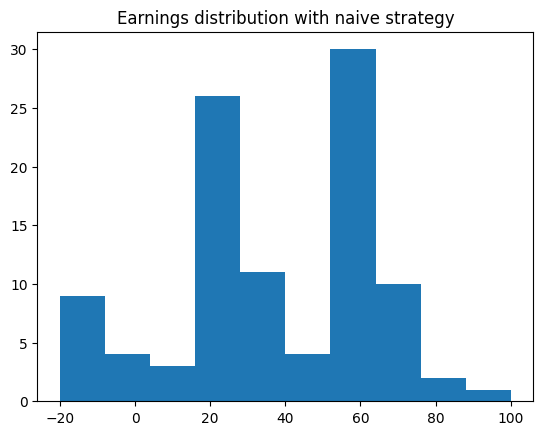

In [3]:
earnings = []
final_states = []
for i in range(100):
    machine = Machine()
    machine.execute_strategy(actions_taken)
    earnings.append(machine.earnings)
    final_states.append(machine.state)

import matplotlib.pyplot as plt

plt.hist(earnings)
plt.title("Earnings distribution with optimal strategy")
plt.show()
print("Average money earned with optimal strategy, according to simulation : ", np.mean(earnings))

earnings = []
final_states_2 = []
for i in range(100):
    machine = Machine()
    machine.execute_strategy(policy)
    earnings.append(machine.earnings)
    final_states_2.append(machine.state)

plt.hist(earnings)
plt.title("Earnings distribution with naive strategy")
print("Average money earned with naive strategy, according to simulation : ", np.mean(earnings))

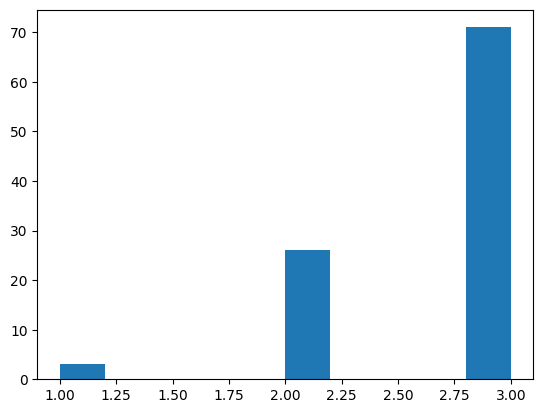

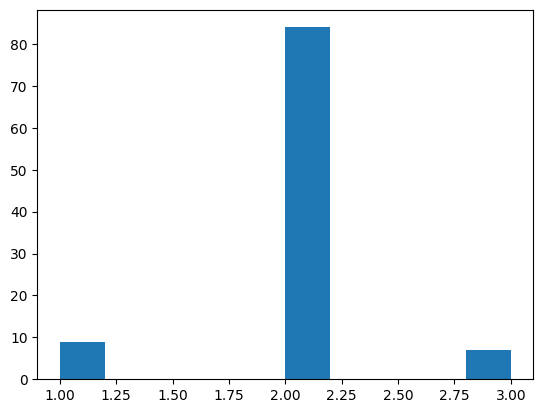

In [4]:
plt.hist(final_states); plt.show() # Number of machines in different states at the end of the simulation for the optimal strategy
plt.hist(final_states_2); plt.show() # Same for the example strategy

In [5]:
actions_taken # Actions taken

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 2, 2, 3],
       [0, 1, 2, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [6]:
action_names = ['nothing', 'maitain', 'repair', 'replace']
print("If the machine is new, do :" + " ; ".join([" " + action_names[action] + " for month " + str(i) for i, action in enumerate(actions_taken[:, 0])]))
print("If the machine is in good shape, do :" + " ; ".join([" " + action_names[action] + " for month " + str(i) for i, action in enumerate(actions_taken[:, 1])]))
print("If the machine is old, do :" + " ; ".join([" " + action_names[action] + " for month " + str(i) for i, action in enumerate(actions_taken[:, 2])]))
print("If the machine is broken, do :" + " ; ".join([" " + action_names[action] + " for month " + str(i) for i, action in enumerate(actions_taken[:, 3])]))

If the machine is new, do : nothing for month 0 ;  nothing for month 1 ;  nothing for month 2 ;  nothing for month 3 ;  nothing for month 4 ;  nothing for month 5 ;  nothing for month 6 ;  nothing for month 7 ;  nothing for month 8 ;  nothing for month 9 ;  nothing for month 10 ;  nothing for month 11
If the machine is in good shape, do : maitain for month 0 ;  maitain for month 1 ;  maitain for month 2 ;  maitain for month 3 ;  maitain for month 4 ;  maitain for month 5 ;  maitain for month 6 ;  repair for month 7 ;  maitain for month 8 ;  nothing for month 9 ;  nothing for month 10 ;  nothing for month 11
If the machine is old, do : repair for month 0 ;  repair for month 1 ;  repair for month 2 ;  repair for month 3 ;  repair for month 4 ;  repair for month 5 ;  repair for month 6 ;  repair for month 7 ;  repair for month 8 ;  nothing for month 9 ;  nothing for month 10 ;  nothing for month 11
If the machine is broken, do : replace for month 0 ;  replace for month 1 ;  replace for mo

## II. Stock Management

1) <p style="color:green">Describe the problem in terms of a stochastic control problem. What is the state? What is the control? What is the cost? What is the dynamics?</p>


2) <p style="color:green">Write the Bellman equation for this problem.</p>

3) <p style="color:green">What is a policy for this problem? Write a simulator taking as argument a policy and an integer returning the estimated expected cost associated with the policy with 95% confidence interval.</p>

In [69]:
np.sum(p)*10

60.0

### Calculating the Optimal Policy

In [259]:
from scipy import stats

T = 14 # Time horizon
stock_cost = 0.1
buying_cost = 1.
selling_price = 3.

p = [0.2, 0.2, 0.4, 0.4, 0.7, 0.7, 0.2, 0.2, 0.8, 0.8, 0.5, 0.5, 0.2, 0.2] # Demand for each month

# p = [0.2]*T

demand_probs = np.array([stats.binom(10, p[t]).pmf(range(11)) for t in range(len(p))]) # pmf for the demands / for each month

states = np.arange(21) # Stocks
actions = np.arange(6) # Number of commands => 0 to 5

V = np.zeros((T, 21), dtype=float)
actions_taken = np.zeros((T, 21), dtype=int) # Optimal policy


stock = np.arange(21) # Possible stocks for the last month
demand = np.arange(11) # Possible demands for the last month

# Creating the random variable for the satisfied demand, for each stock level
# It is a vector of random variable, with one coordinate for each stock level

evening_stock = stock[:, None] - demand[None, :] # The stock at the end of the day. Equals the stock at the beginning of the day, minus the sales. Must be positive
                                                 # First axis is for the stocks. Second for each demand
evening_stock = evening_stock * (evening_stock >= 0)
satisfied_demand = stock[:, None] - evening_stock # The satisfied demand at the end of the day

print(satisfied_demand.shape, demand_probs.shape)

expected_sales_ = satisfied_demand@demand_probs[-1] # Expected sales for each stock for the last month => Expectancy "along" the demands

# V[-1, :] = selling_price * expected_sales_ - stock_cost * (stock - expected_sales_) # Expectancy of the gain for the last day for each state

def expected_sales(stock, t):
    ''' Calculates the expected sales for the current stock at month t in the morning '''

    demand = np.arange(11) # possible demands for the last month
    satisfied_demand = np.clip(demand, 0, stock) # The demand that can be satisfied with the current stock
    
    # Expectancy of the sold stock
    return demand_probs[t]@satisfied_demand


def expected_gain(stock, a, t): 
    ''' Calculates the gain at the end of the month for the stock, equal to the sales minus 1/10th of the remaining stock minus the action '''
    return selling_price * expected_sales(stock + a, t) - stock_cost * (a + stock - expected_sales(stock + a, t)) - a * buying_cost

# Calculate the optimal strategy
for t in range(T-2, -1, -1):
    for state in states:
        outcomes = []
        for action in actions:
            if action + state > 20:
                outcomes.append(-np.inf)
                continue

            ex_gain = expected_gain(state, action, t) # Expected gain for the current state and action
            for demand in range(11):
                stock = state + action - demand # Stock for next day
                if stock > 20:
                    ex_gain -= 1e6
                stock = np.clip(stock, 0, 20)
                ex_gain += V[t+1, stock] * demand_probs[t, demand]
            outcomes.append(ex_gain)

        best_action = np.argmax(outcomes)
        best_earning = np.max(outcomes)
        V[t, state] = best_earning
        actions_taken[t, state] = best_action

(21, 11) (14, 11)


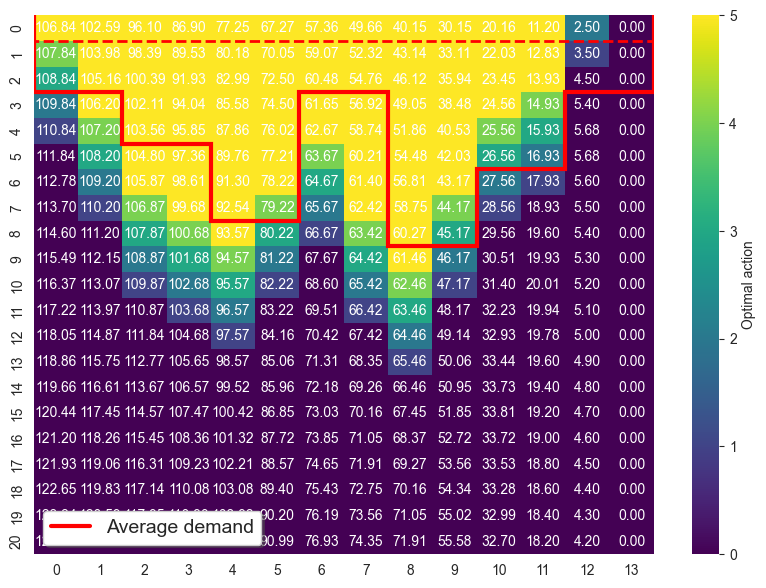

In [260]:
# Plot the optimal strategy
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
# Plot the strategy as an heatmap and the expected profits for labels of the heatmap
sns.heatmap(actions_taken.T, cmap='viridis', annot=False, fmt='g', cbar=True, xticklabels=1, yticklabels=1, cbar_kws={'label': 'Optimal action'})
# We add the the profits to the heatmap
for i in range(21):
    for j in range(14):
        plt.text(j+0.5, i+0.5, f'{V[j, i]:.2f}', ha='center', va='center', color='white')

# Plot the average demand for each month under the x axis of the heatmap
plt.plot([-1, 15], [1, 1], 'r--', linewidth=2)
plt.stairs(np.array(p)*10 + 1, color='red', label='Average demand', linewidth=3)
plt.legend(
    loc='lower left',
    fontsize=14,
    shadow=True
)

In [261]:
V[0,11]

117.2236569483687

### Simulating the strategy

Estimated expected number of points : 117.49


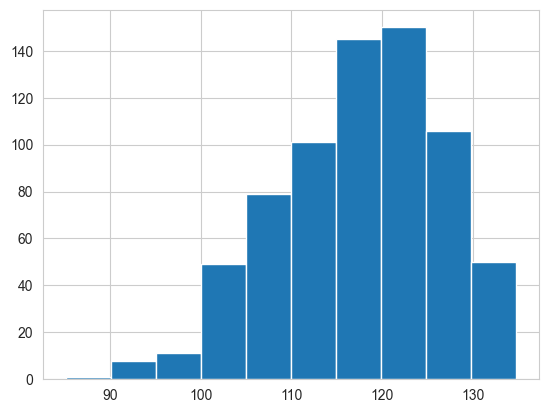

95% confidence interval : [116.83243 ; 118.15357]


In [266]:
def simulate(strategy):
    ''' Function to simulate a given strategy's output '''
    stock = 10
    money_generated = 0

    for t in range(T):
        action = strategy[t, stock]
        stock += action
        money_generated -= buying_cost * action
        
        demand = stats.binom(10, p[t]).rvs()

        sales = min(stock, demand)
        stock -= sales
        
        money_generated += selling_price * sales
        money_generated -= stock_cost * stock

    return money_generated
        


def simulator(strategy):
    ''' Function to run multiple simulations, to calculate the expectancy of a given strategy, along with the score pmf '''

    executions = []
    for i in range(700):
        executions.append(simulate(strategy))

    print(f"Estimated expected number of points : {np.mean(executions):.2f}")
    plt.hist(executions)
    plt.show()

    print(f"95% confidence interval : [{np.mean(executions) - 1.96 / np.sqrt(len(executions)) * np.std(executions):.5f} ; {np.mean(executions) + 1.96 / np.sqrt(len(executions)) * np.std(executions):.5f}]")

simulator(actions_taken)

### Solving for T = 96 days

In [273]:
from scipy import stats

T = 96 # Time horizon
stock_cost = 0.1
buying_cost = 1.
selling_price = 3.

p = [0.2, 0.2, 0.4, 0.4, 0.7, 0.7, 0.2, 0.2, 0.8, 0.8, 0.5, 0.5] * 8 # Demand for each month / perdiodic

demand_probs = np.array([stats.binom(10, p[t]).pmf(range(11)) for t in range(len(p))]) # pmf for the demands / for each month

states = np.arange(21) # Stocks
actions = np.arange(6) # Number of commands => 0 to 5

V = np.zeros((T, 21), dtype=float)
actions_taken = np.zeros((T, 21), dtype=int) # Optimal policy


stock = np.arange(21) # Possible stocks for the last month
demand = np.arange(11) # Possible demands for the last month

# Creating the random variable for the satisfied demand, for each stock level
# It is a vector of random variable, with one coordinate for each stock level

evening_stock = stock[:, None] - demand[None, :] # The stock at the end of the day. Equals the stock at the beginning of the day, minus the sales. Must be positive
                                                 # First axis is for the stocks. Second for each demand
evening_stock = evening_stock * (evening_stock >= 0)
satisfied_demand = stock[:, None] - evening_stock # The satisfied demand at the end of the day

expected_sales_ = satisfied_demand@demand_probs[-1] # Expected sales for each stock for the last month => Expectancy "along" the demands

# V[-1, :] = selling_price * expected_sales_ - stock_cost * (stock - expected_sales_) # Expectancy of the gain for the last day for each state

def expected_sales(stock, t):
    ''' Calculates the expected sales for the current stock at month t in the morning '''

    demand = np.arange(11) # possible demands for the last month
    satisfied_demand = np.clip(demand, 0, stock) # The demand that can be satisfied with the current stock
    
    # Expectancy of the sold stock
    return demand_probs[t]@satisfied_demand


def expected_gain(stock, a, t): 
    ''' Calculates the gain at the end of the month for the stock, equal to the sales minus 1/10th of the remaining stock minus the action '''
    return selling_price * expected_sales(stock + a, t) - stock_cost * (a + stock - expected_sales(stock + a, t)) - a * buying_cost

# Calculate the optimal strategy
for t in range(T-2, -1, -1):
    for state in states:
        outcomes = []
        for action in actions:
            if action + state > 20:
                outcomes.append(-np.inf)
                continue

            ex_gain = expected_gain(state, action, t) # Expected gain for the current state and action
            for demand in range(11):
                stock = state + action - demand # Stock for next day
                if stock > 20:
                    ex_gain -= 1e6
                stock = np.clip(stock, 0, 20)
                ex_gain += V[t+1, stock] * demand_probs[t, demand]
            outcomes.append(ex_gain)

        best_action = np.argmax(outcomes)
        best_earning = np.max(outcomes)
        V[t, state] = best_earning
        actions_taken[t, state] = best_action

Estimated expected number of points : 839.44


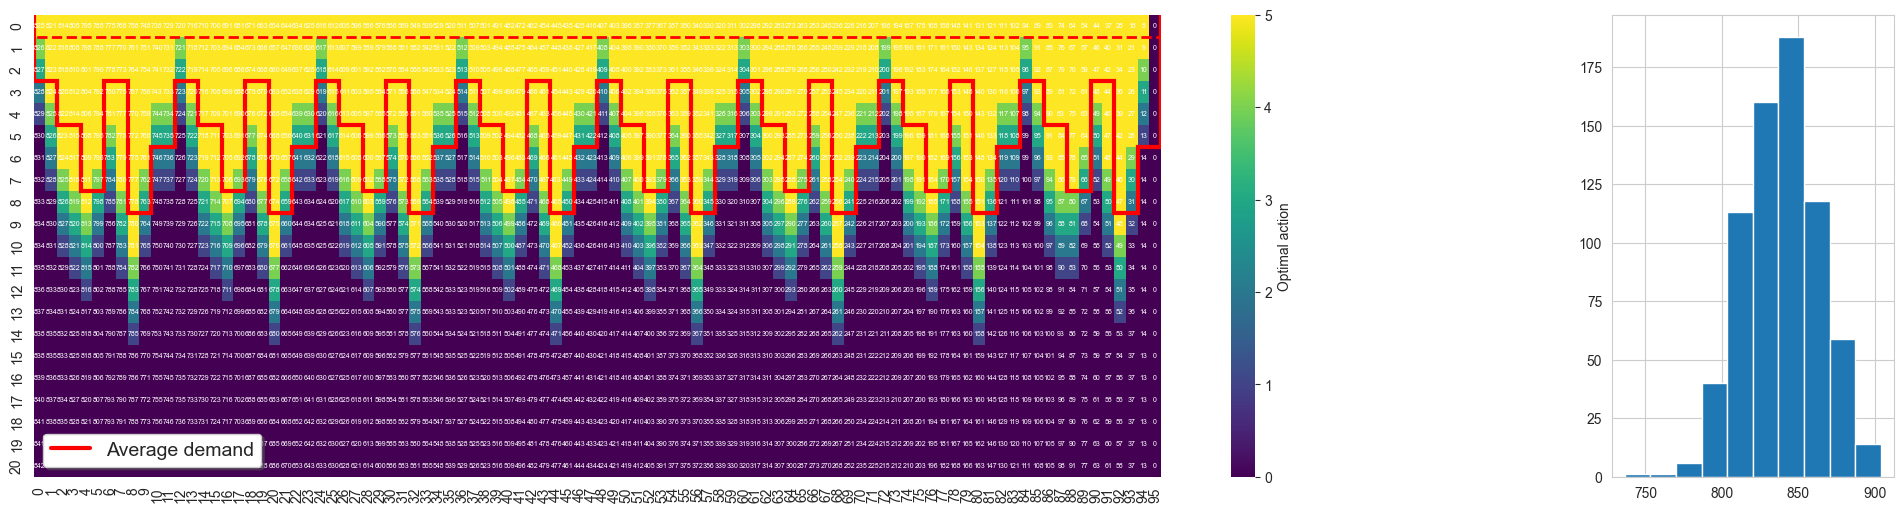

95% confidence interval : [837.63586 ; 841.23671]


In [299]:
# Plot the optimal strategy

plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(24, 6))
plt.subplot(1,2,1)

# Plot the strategy as an heatmap and the expected profits for labels of the heatmap
sns.heatmap(actions_taken.T, cmap='viridis', annot=False, fmt='g', cbar=True, xticklabels=1, yticklabels=1, cbar_kws={'label': 'Optimal action'})
# We add the the profits to the heatmap
for i in range(21):
    for j in range(T):
        plt.text(j+0.5, i+0.5, f'{int(V[j, i])}', ha='center', va='center', color='white', fontsize=5)

# Plot the average demand for each month under the x axis of the heatmap
plt.plot([-1, T+1], [1, 1], 'r--', linewidth=2)
plt.stairs(np.array(p)*10 + 1, color='red', label='Average demand', linewidth=3)
plt.legend(
    loc='lower left',
    fontsize=14,
    shadow=True
)

plt.subplot(1, 2, 2)

simulator(actions_taken)

# Dice Trading

Estimated expected number of points : 35.87


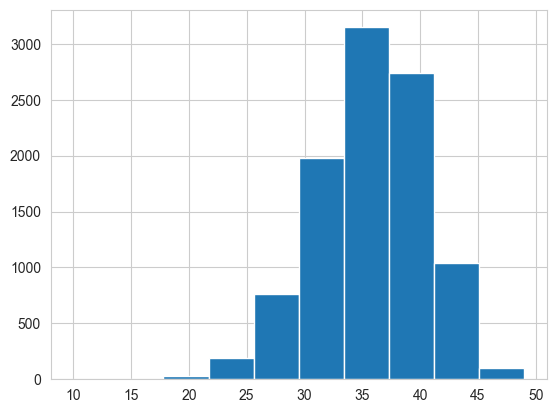

95% confidence interval : [35.77753 ; 35.96567]


In [313]:
T = 10

max_number_of_dices = 3
dice_cost = 5

def simulate(strategy, T=T):
    ''' Function to simulate a given strategy's output '''
    points = 0
    dices = 1
    
    for t in range(T):
        ''' Each month, buy a dice if the strategy says so if we can '''
        if strategy(t, points, dices) and points > 5:
            assert dices < max_number_of_dices, "Can't buy more than the maximum number of dices"
            dices += 1
            points -= 5
        
        points += max([np.random.randint(1, 7) for dice in range(dices)])
    
    return points


def simulator(strategy, T=T):
    ''' Function to run multiple simulations, to calculate the expectancy of a given strategy, along with the score pmf '''

    executions = []
    for i in range(10000):
        executions.append(simulate(strategy, T=T))

    print(f"Estimated expected number of points : {np.mean(executions):.2f}")
    plt.hist(executions)
    plt.show()

    print(f"95% confidence interval : [{np.mean(executions) - 1.96 / np.sqrt(len(executions)) * np.std(executions):.5f} ; {np.mean(executions) + 1.96 / np.sqrt(len(executions)) * np.std(executions):.5f}]")

def myStrategy(t, n_points, n_dices):
    ''' A 'naive' strategy that buys three dices as soon as possible '''
    return False if n_dices > 2 else True

simulator(myStrategy)

In [350]:
from functools import lru_cache

@lru_cache # using a cache to speed up the execution
def law_of_maximum(n_dices):
    if n_dices == 0: return [0]*6
    ''' pmf for the maximum of n dice rolls '''
    dice_rolls = []
    for roll in range(1000000): # very accurate simulation
        dice_rolls.append(max([np.random.randint(1, 7) for dice in range(n_dices)]))
    
    dice_rolls = np.array(dice_rolls)
    
    probabilities = [(dice_rolls == i).mean() for i in range(1, 7)]
    return np.array(probabilities)

for i in range(1, 11):
    ''' Precompute the values '''
    law_of_maximum(i)

In [336]:
T = 10

@lru_cache(maxsize=None)
def get_optimal_strategy(time, number_of_points, number_of_dices, T=T):
    assert number_of_dices <= max_number_of_dices, "Number of dices cannot exceed 10"
    assert time <= T, "Time cannot exceed T"

    if time == T:
        return number_of_points, False
    
    # We calculate the outcome without buying a new dice
    outcome_without_buying = 0

    for face in range(1, 7):
        outcome_without_buying += get_optimal_strategy(time + 1, number_of_points + face, number_of_dices, T=T)[0] * law_of_maximum(number_of_dices)[face-1]

    if number_of_points <= dice_cost or number_of_dices == max_number_of_dices:
        return outcome_without_buying, False
    
    # We calculate the outcome with buying a new dice
    outcome_with_buying = 0

    for face in range(1, 7):
        outcome_with_buying += get_optimal_strategy(time+1, number_of_points + face - dice_cost, number_of_dices + 1, T=T)[0] * law_of_maximum(number_of_dices+1)[face-1]

    return max(outcome_with_buying, outcome_without_buying), outcome_with_buying > outcome_without_buying

get_optimal_strategy(0, 0, 1)

(37.62560042894136, False)

In [337]:
actions_taken = np.zeros((T, 20, max_number_of_dices), dtype=bool) # the actions taken at each time and state

for t, n_points, n_dices in np.ndindex((T, 20, max_number_of_dices)):
    actions_taken[t, n_points, n_dices] = get_optimal_strategy(t, n_points, n_dices+1)[1]

Estimated expected number of points : 37.63


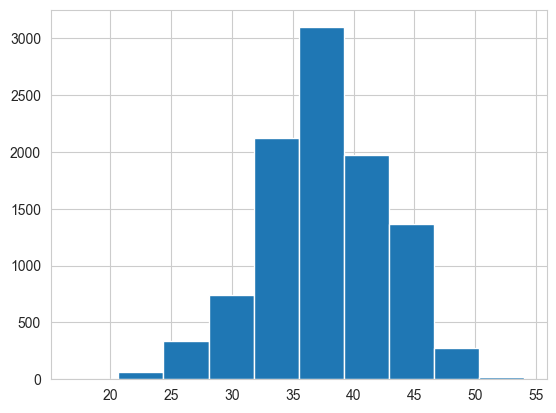

95% confidence interval : [37.53436 ; 37.73024]


In [338]:
optimal_strategy = lambda t, n_points, n_dices: get_optimal_strategy(t, n_points, n_dices)[1]

simulator(optimal_strategy, T=T)

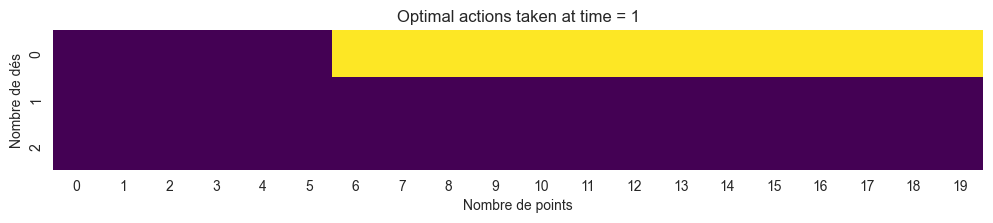

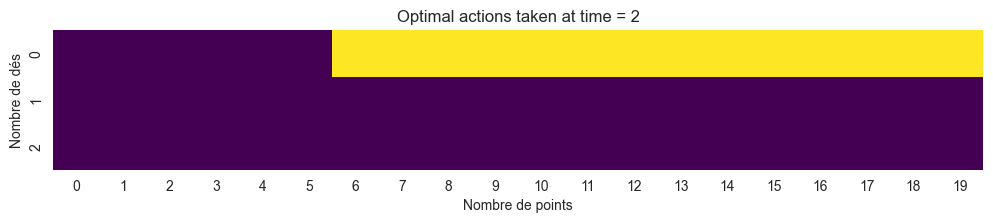

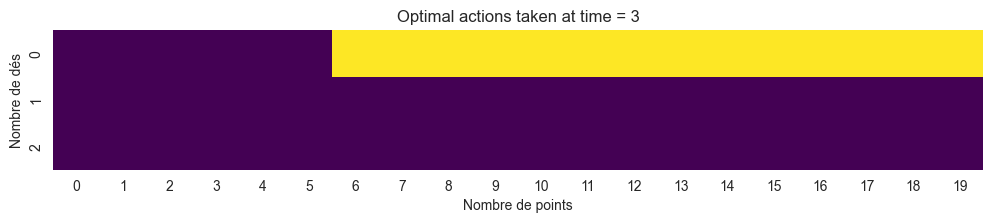

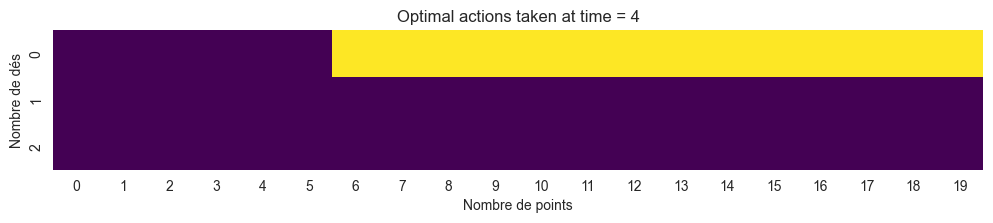

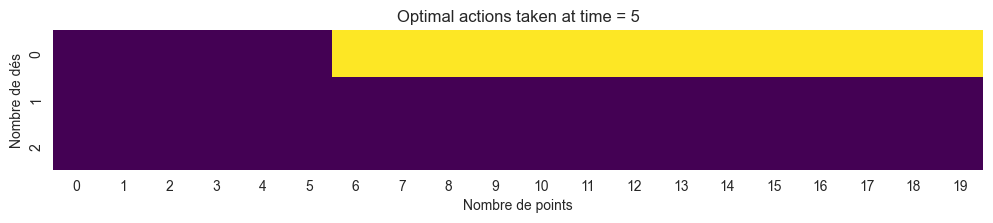

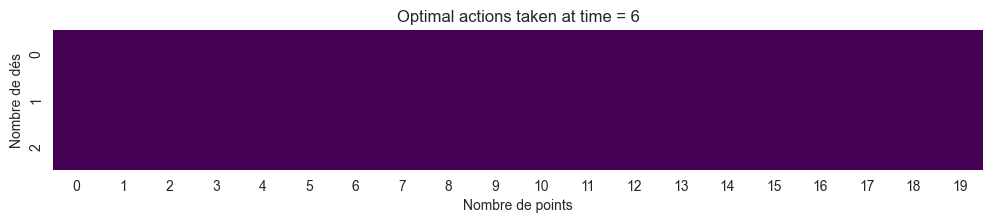

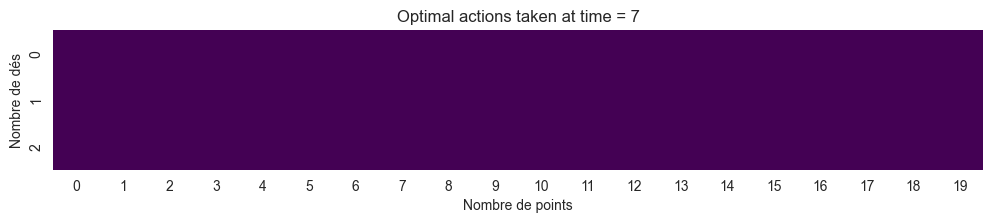

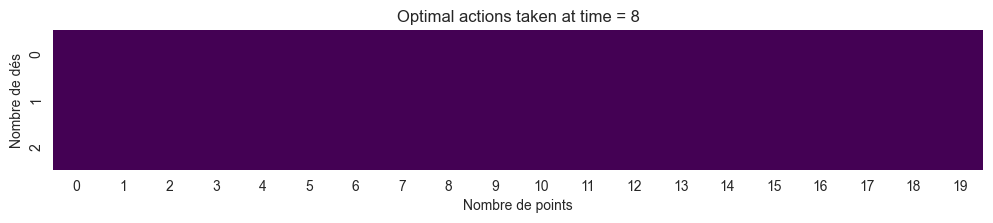

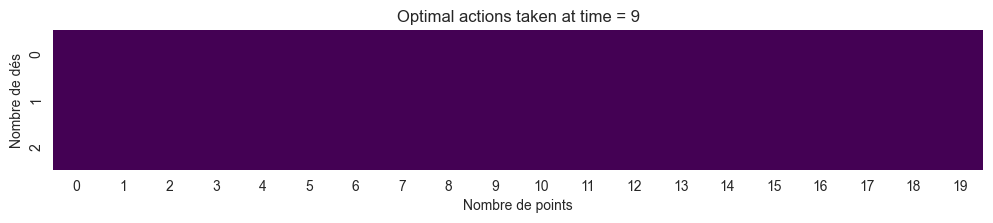

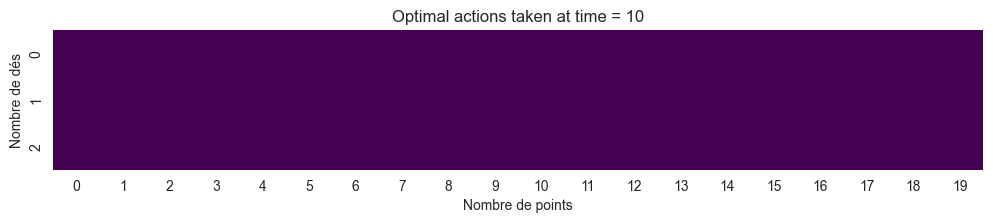

In [465]:
actions_taken = np.zeros((T, 20, max_number_of_dices), dtype=bool) # the actions taken at each time and state
for t, n_points, n_dices in np.ndindex((T, 20, max_number_of_dices)):
    actions_taken[t, n_points, n_dices] = get_optimal_strategy(t, n_points, n_dices+1)[1]

n_points = 60

for t, actions in enumerate(actions_taken):
    plt.figure(figsize=(12, 6))

    # plt.imshow(actions[..., 0][:n_points].T, cmap='viridis', aspect='auto')
    sns.heatmap(actions.T, cmap='viridis', annot=False, fmt='g', cbar=False, xticklabels=1, yticklabels=1, cbar_kws={'label': 'Optimal action'}, square=True)
    plt.xlabel('Nombre de points')
    plt.ylabel('Nombre de dés')
    plt.title(f'Optimal actions taken at time = {t+1}')
    # ax.set_yticklabels(range(1, max_number_of_dices+1))

    plt.show()


In [433]:
T = 10

max_number_of_dices = 3
dice_cost = 5


def strategy_avg_result(t, number_of_points, number_of_dices, T=T):
    outcome = 0
    for face in range(1, 7):
        outcome += get_optimal_strategy_sacrifice(t, number_of_points + face, number_of_dices, T=T)[0] * law_of_maximum(number_of_dices)[face-1]
    return outcome

@lru_cache(maxsize=None)
def get_optimal_strategy_sacrifice(time, number_of_points, number_of_dices, T=T):

    assert number_of_dices <= max_number_of_dices, "Number of dices cannot exceed 10"
    assert number_of_dices > 0, "Number of dices cannot be zero"
    assert time <= T, "Time cannot exceed T"

    # At the end, return the number of points
    if time == T:
        return number_of_points, False
    
    # We calculate the outcome without buying a new dice and without sacrifice
    # outcome_without_buying_or_sacrifice = strategy_avg_result(t+1, number_of_points, number_of_dices, T=T)
    are_valid = [True]*4

    outcome_without_buying_or_sacrifice = strategy_avg_result(time+1, number_of_points, number_of_dices, T=T)

    if number_of_dices < max_number_of_dices and n_points >= dice_cost:
        # We calculate the outcome with buying a new dice
        outcome_with_buying_without_sacrifice = strategy_avg_result(time+1, number_of_points - dice_cost, number_of_dices + 1, T=T)
    else:
        outcome_with_buying_without_sacrifice = 0
        are_valid[1] = False

    # Handling the sacrifices

    outcome_with_buying_with_sacrifice = 0
    if number_of_points > dice_cost:
        for face in range(1, 7):
            outcome_with_buying_with_sacrifice += get_optimal_strategy_sacrifice(time+1, number_of_points + 2 * face - dice_cost, number_of_dices, T=T)[0] * law_of_maximum(number_of_dices+1)[face-1]
    else:
        outcome_with_buying_with_sacrifice = 0
        are_valid[2] = False
        
    if number_of_dices > 1:
        outcome_without_buying_with_sacrifice = 0
        for face in range(1, 7):
            outcome_without_buying_with_sacrifice += get_optimal_strategy_sacrifice(time+1, number_of_points + 2 * face, number_of_dices - 1, T=T)[0] * law_of_maximum(number_of_dices)[face-1]
    else:
        outcome_without_buying_with_sacrifice = 0
        are_valid[3] = False
             
    # We return the best outcome and the corresponding action

    outcomes = np.array([outcome_without_buying_or_sacrifice, outcome_with_buying_without_sacrifice, outcome_with_buying_with_sacrifice, outcome_without_buying_with_sacrifice])
    corresponding_states = np.array([[0,0],[1,0],[1,1],[0,1]])
    
    # optimal_action = corresponding_states[outcomes.index(max(outcomes))]
    optimal_action = corresponding_states[are_valid][np.argmax(outcomes[are_valid])]
    return max(outcomes[are_valid]), bool(optimal_action[0]), bool(optimal_action[1])

get_optimal_strategy_sacrifice(0, 0, 1)

(50.28423374978139, True, False)

In [444]:
actions_taken = np.zeros((T, 20, max_number_of_dices, 2), dtype=bool) # the actions taken at each time and state
for t, n_points, n_dices in np.ndindex((T, 20, max_number_of_dices)):
    actions_taken[t, n_points, n_dices] = get_optimal_strategy_sacrifice(t, n_points, n_dices+1)[1:]


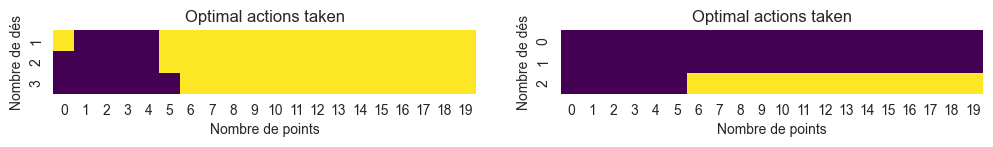

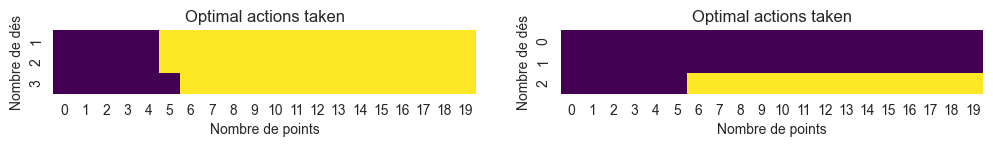

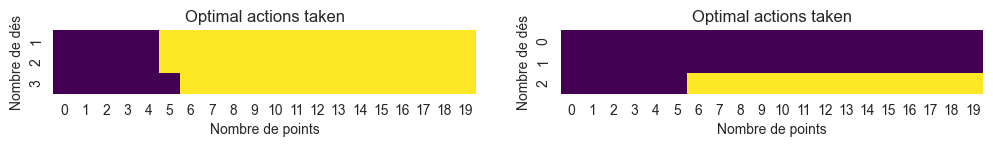

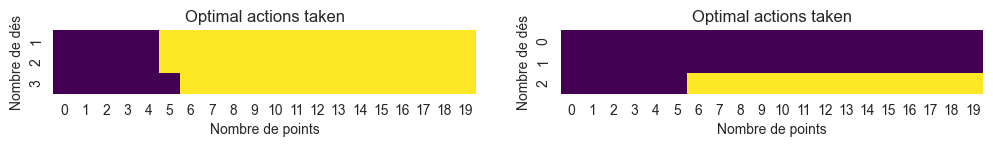

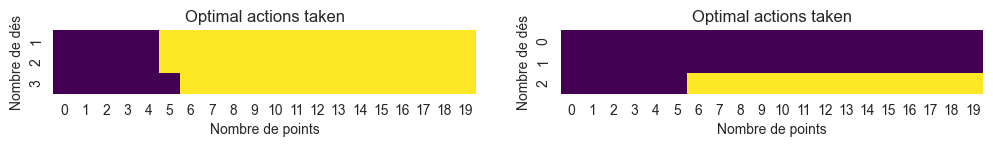

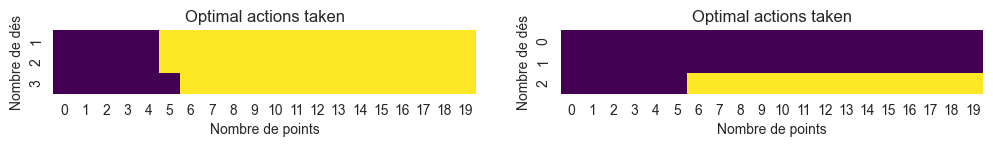

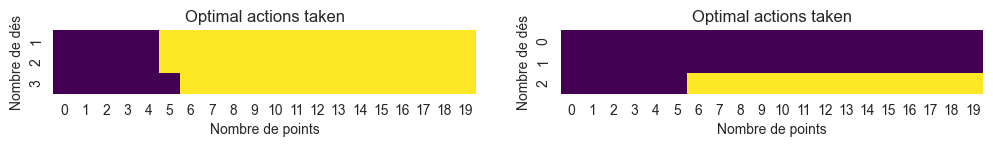

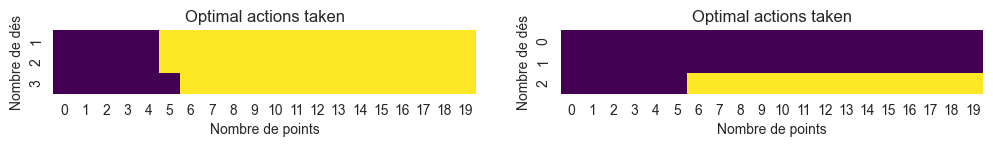

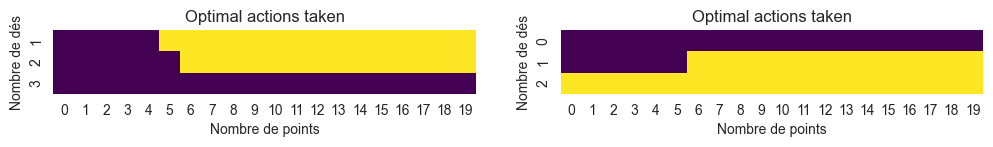

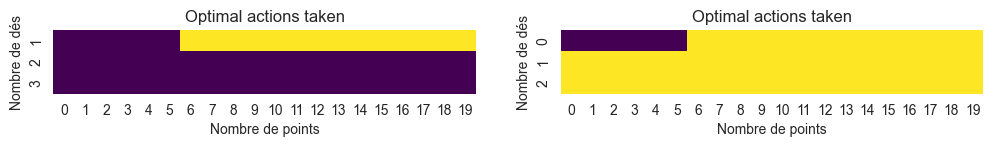

In [456]:
n_points = 60

for actions in actions_taken:
    plt.figure(figsize=(12, 6))

    ax = plt.subplot(1, 2, 1)
    # plt.imshow(actions[..., 0][:n_points].T, cmap='viridis', aspect='auto')
    sns.heatmap(actions[..., 0].T, cmap='viridis', annot=False, fmt='g', cbar=False, xticklabels=1, yticklabels=1, cbar_kws={'label': 'Optimal action'}, square=True)
    plt.xlabel('Nombre de points')
    plt.ylabel('Nombre de dés')
    plt.title('Optimal actions taken')
    ax.set_yticklabels(range(1, max_number_of_dices+1))


    plt.subplot(1, 2, 2)
    # plt.imshow(actions[..., 0][:n_points].T, cmap='viridis', aspect='auto')
    sns.heatmap(actions[..., 1].T, cmap='viridis', annot=False, fmt='g', cbar=False, xticklabels=1, yticklabels=1, cbar_kws={'label': 'Optimal action'}, square=True)
    plt.xlabel('Nombre de points')
    plt.ylabel('Nombre de dés')
    plt.title('Optimal actions taken')
    ax.set_yticklabels(range(1, max_number_of_dices+1))

    plt.show()
